Saúl Alí Caudillo Rodríguez

Tarea 2: El Péndulo Forzado Amortiguado.

# 1. Límite Lineal.
A continuación se muestra el desarrollo previo necesario para analizar el sistema del péndulo forzado amortiguado.

Dada la ecuación de movimiento para el oscilador armónico amortiguado:

$$\ddot{x} + 2\beta \dot{x} + \omega_{0}^{2} = 0$$   

Se dice que cuando $\omega^{2}>\beta^{2}$ se tiene un oscilador armónico inframortiguado cuya solución está dada por:

$$x(t) = Ae^{-\beta t} \cos(\omega_{1} t - \delta)$$  

Conociendo esto y dada la ecuación de movimiento para el péndulo forzado amortiguado:

$$\ddot{\theta} + \mu \dot{\theta} + \omega_{0}^{2}\theta = A\cos(\omega_{d})$$  

Cuyos parámetros son dados por el problema tales que: $A = 1$, $\omega_{0} = 1$ y $\mu = 0.05$, se comparan ambas ecuaciones de movimiento, es decir la del oscilador armónico amortiguado con la ecuación homógenea correspondiente a la del péndulo forzado amortiguado, entonces puede notarse que: $\mu = 2\beta$. Así cómo: 

$$\omega_{0}^{2} = 1 > 6.25 \times 10^{4} = \beta$$

Donde $\beta = \frac{\mu}{2}$, por lo tanto se tiene un sistema infraamortiguado cuya solución esta dada por: 

$$\theta_{c}(t) = A_{0}e^{-\beta t}\cos(\omega_{1}-\delta_{0})$$

Donde $\omega_{1} = \sqrt{\omega_{0}^{2} - \beta^{2}}$ y $A_{0}$ es una constante a determinar imponiendo condiciones iniciales.

Por otra parte hace falta aún la solución particular para la ecuación del péndulo forzado amortiguado (PFA). Dicha solución está dada por:

$$\theta_{p}(t) = \frac{A}{(\omega_{0}^{2}-\omega_{d}^2)^{2}+4\omega_{d}^{2}\beta^{2}}\cos(\omega_{d} t -\delta)$$

El factor que multiplica a la función coseno del lado derecho de la ecuación anterior es la amplitud $D$ generado por la fuerza externa.

a) A continuación se implementa un código para graficar la amplitud $D$ con los parámetros dados $A$, $\omega_{0}$ y $\mu$ definidos anteriormente, en función de la frecuencia de la fuerza externa. 

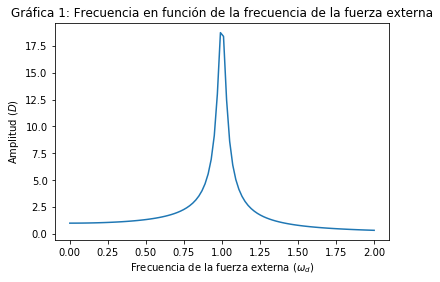

In [363]:
import numpy as np
import matplotlib.pyplot as ply
import math as mt
from scipy.integrate import odeint

#Se define la función para la amplitud, en el texto de arriba aparece como D.
def amplitud(omega_d):
    A = 1.
    omega_0 = 1.
    mu = 0.05
    beta = mu/2.
    
    D = A/(np.sqrt((omega_0**2 - omega_d**2)**2 + 4.*(omega_d**2)*(beta**2)))
    
    return(D)

X = np.linspace(0, 2, 100)
Y = np.zeros(100)

for i in range(100):
    Y[i] = amplitud(X[i])

plt.plot(X, Y)
plt.title('Gráfica 1: Frecuencia en función de la frecuencia de la fuerza externa')
plt.xlabel('Frecuencia de la fuerza externa ($\omega_{d}$)')
plt.ylabel('Amplitud ($D$)')
plt.show()

Como puede apreciarse en la gráfica anterior existe una resonancia para $\omega_d = 1$



b) De la solución particular $\theta_{p}(t)$ existe una fase $\delta$ la cual está dada por:

$$\delta = \arcsin(\frac{\omega_{0}^{2} - \omega_{d}^{2}}{(\omega_{0}^{2} - \omega_{d}^{2})^{2} + 4\omega_{d}^{2}\beta^{2}})$$.

A continuación se implementa un código para graficar la fase de la solución particular como función de la frecuencia de la fuerza externa $\omega_{d}$ dados nuevamente los parámetros  $\mu = 0.05$ y $\omega_{0} = 1$.

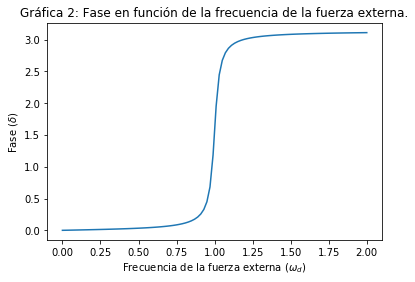

In [364]:
def fase(omega_d):
    omega_0 = 1.
    mu = 0.05
    beta = mu/2.
    
    delta = mt.acos((omega_0**2 - omega_d**2) / (mt.sqrt((omega_0**2 - omega_d**2)**2 + 4.*(omega_d**2)*(beta**2))))
    
    return(delta)

X = np.linspace(0, 2, 100)
Y = np.zeros(100)

for i in range(100):
    Y[i] = fase(X[i])

plt.plot(X, Y)
plt.title('Gráfica 2: Fase en función de la frecuencia de la fuerza externa.')
plt.xlabel('Frecuencia de la fuerza externa ($\omega_{d}$)')
plt.ylabel('Fase ($\delta$)')
plt.show()

c) La solución $\theta(t)$ para la ecuación de movimiento del péndulo forzado amortiguado está dada por la suma de las soluciones $\theta_{c}(t)$ y $\theta_{p}(t)$:

$$\theta(t) = A_{0}e^{-\beta t}\cos(\omega_{0} t - \delta_{0}) + D\cos(\omega_{d} t - \delta_{0})$$

Y derivando temporalmente la ecuación anterior obtenemos la velocidad angular:

$$\dot{\theta}(t) = -A_{0}e^{-\beta t}[\omega_{0}\sin(\omega_{0}t - \delta_{0}) + \beta\cos(\omega_{0}t - \delta_{0})] - D\omega_{d}\sin(\omega_{d}t - \delta)$$

Como puede apreciarse, tenemos dos constantes: $A_{0}$ y $\delta_{0}$ a determinar mediante condiciones inciales. Ajustando dichas condiciones como: $\theta(t=0) = \theta_{0}$ y $\dot{\theta}(t=0) = \dot{\theta_{0}}$ se obtienen las siguientes ecuaciones:

$$A_{0} = \frac{\theta_{0} - D\cos(\delta)}{\cos(\delta_{0})}$$

Y:

$$\delta_{0} = \arctan(\frac{\dot{\theta_{0}} + \theta_{0}\beta - D[\beta\cos(\delta) + \omega_{d}\sin(\delta)]}{\theta_{0}\omega_{0} - D\omega_{0}\cos(\delta)})$$

A continuación se presentan las gráficas del ángulo $\theta(t)$ y velocidad angular $\dot{\theta}(t)$ para las condiciones inciales $\theta_{0} = 5$ y $\dot{\theta_{0}} = 0$ así como: $\theta_{0} = 10$ y $\dot{\theta_{0}} = 10$ con una frecuencia para la fuerza externa de $\omega_{d}=\omega_{0}/2$ para ambos casos.

Nota: $\omega_{1} \approx \omega_{0}$ por ello se toma en las ecuaciones anteriores $\omega_{0}$ en lugar de $\omega_{1}$.

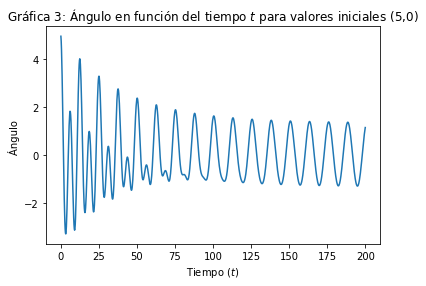

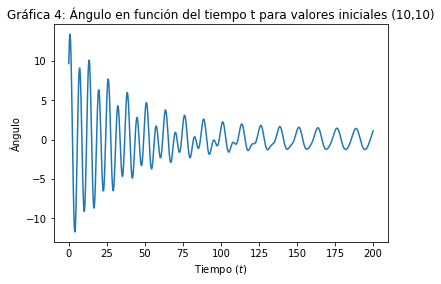

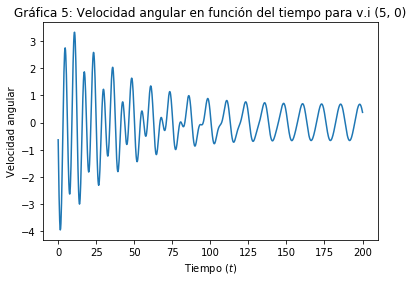

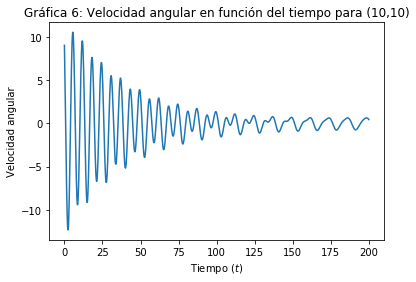

In [365]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

def fase_0(theta_0, theta_d_0, omega_d):
    beta =  0.025
    omega_0 = 1.
    delta = fase(omega_d)
    
    delta_0 = mt.atan((theta_d_0 + theta_0*beta - amplitud(omega_d)*(beta*mt.cos(delta) + omega_d*mt.cos(delta))) / (theta_0*omega_0 - amplitud(omega_d)))
    
    return(delta_0)

    
def amplitud_0(theta_0, theta_d_0):
    omega_d = 0.5
    omega_0 = 1.
    D = amplitud(omega_d)
    delta = fase(omega_d)
    delta_0 = fase_0(theta_0, theta_d_0, omega_0)
    
    A_0 = (theta_0 - D*mt.cos(delta)) / (mt.cos(delta_0))
    
    return(A_0)
    
def angulo(theta_0, theta_d_0, t): 
    #Se calculan previamente todas las funciones complicadas anteriormente definidas y necesarias para el cálculo.
    beta = 0.025
    omega_0 = 1.0
    omega_d = 0.5
    delta_0 = fase_0(theta_0, theta_d_0, omega_d)
    delta = fase(omega_d)
    A_0 = amplitud_0(theta_0, theta_d_0) 
    D = amplitud(omega_d)
    
    #Se divide la solución en la suma de la solución complementaria más la solución particular.
    theta_c = A_0*mt.exp(-beta*t)*mt.cos(omega_0*t - delta_0)
    theta_p = D*mt.cos(omega_d*t - delta)
    
    return(theta_c + theta_p)

def vel_an(theta_0, theta_d_0, t):
    #Se calculan previamente todas las funciones complicadas anteriormente definidas y necesarias para el cálculo.
    beta = 0.025
    omega_0 = 1.0
    omega_d = 0.5
    delta_0 = fase_0(theta_0, theta_d_0, omega_d)
    delta = fase(omega_d)
    A_0 = amplitud_0(theta_0, theta_d_0) 
    D = amplitud(omega_d)
    
    #Se divide la solución en la suma de la solución complementaria más la solución particular.
    vel_an_c = -A_0*mt.exp(-beta*t)*(omega_0*mt.sin(omega_0*t-delta_0) + beta*mt.cos(omega_0*t - delta_0))
    vel_an_p = -D*omega_d*mt.sin(omega_d*t - delta)

    return(vel_an_c + vel_an_p)

X = np.linspace(0, 200, 1000)
Y = np.zeros(1000)

for i in range(1000):
    Y[i] = angulo(5, 0, X[i])

plt.plot(X, Y)
plt.title('Gráfica 3: Ángulo en función del tiempo $t$ para valores iniciales (5,0)')
plt.xlabel('Tiempo ($t$)')
plt.ylabel('Ángulo ')
plt.show()

for i in range(1000):
    Y[i] = angulo(10, 10, X[i])

plt.plot(X, Y)
plt.title('Gráfica 4: Ángulo en función del tiempo t para valores iniciales (10,10)')
plt.xlabel('Tiempo ($t$)')
plt.ylabel('Ángulo')
plt.show()

for i in range(1000):
    Y[i] = vel_an(5, 0, X[i])

plt.plot(X, Y)
plt.title('Gráfica 5: Velocidad angular en función del tiempo para v.i (5, 0)')
plt.xlabel('Tiempo ($t$)')
plt.ylabel('Velocidad angular')
plt.show()

for i in range(1000):
    Y[i] = vel_an(10, 10, X[i])

plt.plot(X, Y)
plt.title('Gráfica 6: Velocidad angular en función del tiempo para (10,10)')
plt.xlabel('Tiempo ($t$)')
plt.ylabel('Velocidad angular')
plt.show()

Es posible ver, como, las curvas de las gráficas 3 a 6 muestran como la solución particular se mantiene para tiempos grandes impidiendo que se agote el movimiento del sistema, mientras que las grandes amplitudes iniciales tanto en velocidad como en angulo decrecen rápidamente hasta llegar a las amplitudes dadas por la fuerza externa. 

d) Ahora se consideran dos nuevas condiciones iniciales para nuestro sistema, a saber: $\theta_{0}=6$, $\dot{\theta_0}=15$, y $\theta_{0}=12$, $\dot{\theta_0}=0$; de forma que se construirán, implementando la mayor parte código anterior, los espacios de fase para el sistema con las nuevas condiciones. El uso del código anterior facilita el problema de encontrar analíticamente $\dot{\theta}$ en función de $\theta$ eliminando el tiempo $t$ de modo que se resuelve numéricamente evaluando $\theta$ y $\dot{\theta}$ a iguales intervalos de tiempo y tomando tales resultado como coordenadas en el espacio fase.

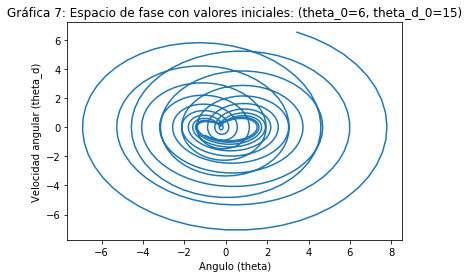

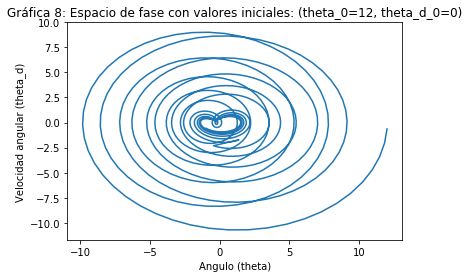

In [366]:
t = 1000
X = np.zeros(t)
Y = np.zeros(t)
T = np.linspace(0, 130, t)

for i in range(t):
    X[i] = angulo(6, 15, T[i])
    
for i in range(t):
    Y[i] = vel_an(6, 15, T[i])
    
plt.plot(X, Y)
plt.title('Gráfica 7: Espacio de fase con valores iniciales: (theta_0=6, theta_d_0=15)')
plt.xlabel('Angulo (theta)')
plt.ylabel('Velocidad angular (theta_d)')
plt.show()

for i in range(500):
    X[i] = angulo(12, 0, T[i])
    
for i in range(500):
    Y[i] = vel_an(12, 0, T[i])
    
plt.plot(X, Y)
plt.title('Gráfica 8: Espacio de fase con valores iniciales: (theta_0=12, theta_d_0=0)' )
plt.xlabel('Angulo (theta)')
plt.ylabel('Velocidad angular (theta_d)')
plt.show()

e) A continuación se muestran los espacios de fase para distintas $A$: $A = 0.5$ y $A = 5$ con $\mu = 0$ y condiciones iniciales: $\theta_{0}=6$ y $\dot{\theta_{0}}=15$.

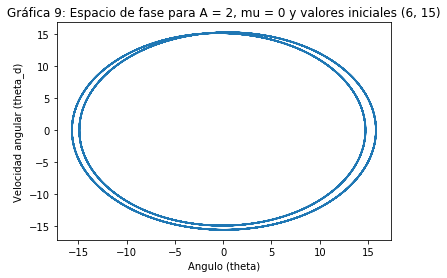

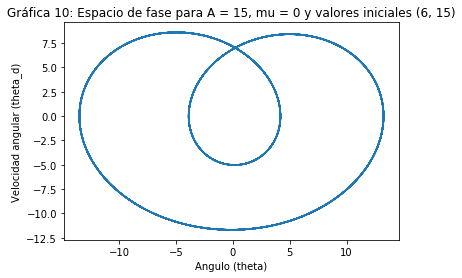

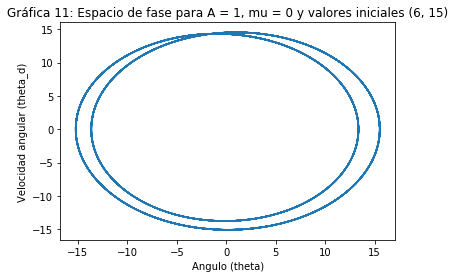

In [367]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

def fase(omega_d):
    #omega_0 = 1.
    #mu = 0.05
    #beta = 0
    
    #delta = mt.acos((omega_0**2 - omega_d**2) / (mt.sqrt((omega_0**2 - omega_d**2)**2 + 4.*(omega_d**2)*(beta**2))))
    
    #return(delta)
    return(0)

def amplitud(omega_d, A):
    omega_0 = 1.
    omega_d = 0.5
    mu = 0.05
    beta = 0
    
    #D = A/(np.sqrt((omega_0**2 - omega_d**2)**2 + 4.*(omega_d**2)*(beta**2)))
    D = A/((omega_0**2 - omega_d**2))
    
    return(D)

def fase_0(theta_0, theta_d_0, omega_d, A):
    beta =  0
    omega_0 = 1.
    delta = fase(omega_d)
    
    delta_0 = mt.atan((theta_d_0 + theta_0*beta - amplitud(omega_d, A)*(beta*mt.cos(delta) + omega_d*mt.cos(delta))) / (theta_0*omega_0 - amplitud(omega_d, A)))
    
    return(delta_0)

    
def amplitud_0(theta_0, theta_d_0, A):
    omega_d = 0.5
    omega_0 = 1.
    D = amplitud(omega_d, A)
    delta = fase(omega_d)
    delta_0 = fase_0(theta_0, theta_d_0, omega_0, A)
    
    A_0 = (theta_0 - D*mt.cos(delta)) / (mt.cos(delta_0))
    
    return(A_0)
    
def angulo(theta_0, theta_d_0, t, A):    
    beta = 0
    omega_0 = 1.0
    omega_d = 0.5
    delta_0 = fase_0(theta_0, theta_d_0, omega_d, A)
    delta = fase(omega_d)
    A_0 = amplitud_0(theta_0, theta_d_0, A) 
    D = amplitud(omega_d, A)
    
    theta_c = A_0*mt.exp(-beta*t)*mt.cos(omega_0*t - delta_0)
    theta_p = D*mt.cos(omega_d*t - delta)
    
    return(theta_c + theta_p)

def vel_an(theta_0, theta_d_0, t, A):
    beta = 0
    omega_0 = 1.0
    omega_d = 0.5
    delta_0 = fase_0(theta_0, theta_d_0, omega_d, A)
    delta = fase(omega_d)
    A_0 = amplitud_0(theta_0, theta_d_0, A) 
    D = amplitud(omega_d, A)
    
    vel_an_c = -A_0*mt.exp(-beta*t)*(omega_0*mt.sin(omega_0*t-delta_0) + beta*mt.cos(omega_0*t - delta_0))
    vel_an_p = -D*omega_d*mt.sin(omega_d*t - delta)

    return(vel_an_c + vel_an_p)

t = 1000
X = np.zeros(t)
Y = np.zeros(t)
T = np.linspace(0, 120, t)

for i in range(t):
    X[i] = angulo(6, 15, T[i], 0.5)
    
for i in range(t):
    Y[i] = vel_an(6, 15, T[i], 0.5)
    
plt.plot(X, Y)
plt.title('Gráfica 9: Espacio de fase para A = 2, mu = 0 y valores iniciales (6, 15)')
plt.xlabel('Angulo (theta)')
plt.ylabel('Velocidad angular (theta_d)')
plt.show()

for i in range(t):
    X[i] = angulo(6, 15, T[i], 5)
    
for i in range(t):
    Y[i] = vel_an(6, 15, T[i], 5)
    
plt.plot(X, Y)
plt.title('Gráfica 10: Espacio de fase para A = 15, mu = 0 y valores iniciales (6, 15)')
plt.xlabel('Angulo (theta)')
plt.ylabel('Velocidad angular (theta_d)')
plt.show()

for i in range(t):
    X[i] = angulo(6., 15., T[i], 1.0)
    
for i in range(t):
    Y[i] = vel_an(6., 15., T[i], 1.0)
    
plt.plot(X, Y)
plt.title('Gráfica 11: Espacio de fase para A = 1, mu = 0 y valores iniciales (6, 15)')
plt.xlabel('Angulo (theta)')
plt.ylabel('Velocidad angular (theta_d)')
plt.show()

f) A continuación se muestran las los espacios de fase para $\mu = 0.1$, $\mu = 2.0$ con amplitud $A = 1$ y mismas condiciones iniciales anteriores ($\theta_0 = 6, \dot{\theta_{0}=15}$)=(6,15). Mientras que para $\mu=0$ se muestra arriba en la gráfica 8.

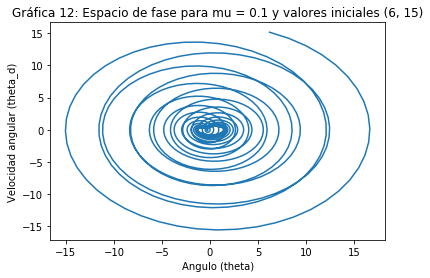

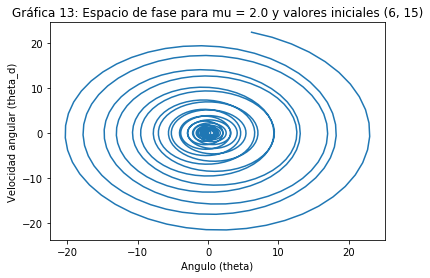

In [368]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

def fase(omega_d, mu):
    omega_0 = 1.
    beta = mu/2.
    
    delta = mt.acos((omega_0**2 - omega_d**2) / (mt.sqrt((omega_0**2 - omega_d**2)**2 + 4.*(omega_d**2)*(beta**2))))
    
    return(delta)

def amplitud(omega_d, mu):
    A = 1.
    omega_0 = 1.
    omega_d = 0.5
    beta = mu/2.
    
    D = A/(np.sqrt((omega_0**2 - omega_d**2)**2 + 4.*(omega_d**2)*(beta**2)))
    
    return(D)

def fase_0(theta_0, theta_d_0, omega_d, mu):
    beta =  mu/2.
    omega_0 = 1.
    delta = fase(omega_d, mu)
    
    delta_0 = mt.atan((theta_d_0 + theta_0*beta - amplitud(omega_d, mu)*(beta*mt.cos(delta) + omega_d*mt.cos(delta))) / (theta_0*omega_0 - amplitud(omega_d, mu)))
    
    return(delta_0)

    
def amplitud_0(theta_0, theta_d_0, mu):
    omega_d = 0.5
    omega_0 = 1.
    D = amplitud(omega_d, mu)
    delta = fase(omega_d, mu)
    delta_0 = fase_0(theta_0, theta_d_0, omega_0, mu)
    
    A_0 = (theta_0 - D*mt.cos(delta)) / (mt.cos(delta_0))
    
    return(A_0)
    
def angulo(theta_0, theta_d_0, t, mu):    
    beta = 0.025
    omega_0 = 1.0
    omega_d = 0.5
    delta_0 = fase_0(theta_0, theta_d_0, omega_d, mu)
    delta = fase(omega_d, mu)
    A_0 = amplitud_0(theta_0, theta_d_0, mu) 
    D = amplitud(omega_d, mu)
    
    theta_c = A_0*mt.exp(-beta*t)*mt.cos(omega_0*t - delta_0)
    theta_p = D*mt.cos(omega_d*t - delta)
    
    return(theta_c + theta_p)

def vel_an(theta_0, theta_d_0, t, mu):
    beta = 0.025
    omega_0 = 1.0
    omega_d = 0.5
    delta_0 = fase_0(theta_0, theta_d_0, omega_d, mu)
    delta = fase(omega_d, mu)
    A_0 = amplitud_0(theta_0, theta_d_0, mu) 
    D = amplitud(omega_d, mu)
    
    vel_an_c = -A_0*mt.exp(-beta*t)*(omega_0*mt.sin(omega_0*t-delta_0) + beta*mt.cos(omega_0*t - delta_0))
    vel_an_p = -D*omega_d*mt.sin(omega_d*t - delta)

    return(vel_an_c + vel_an_p)

t = 1500
X = np.zeros(t)
Y = np.zeros(t)
T = np.linspace(0, 200, t)

for i in range(t):
    X[i] = angulo(6, 15, T[i], 0.1)
    
for i in range(t):
    Y[i] = vel_an(6, 15, T[i], 0.1)
    
plt.plot(X, Y)
plt.title('Gráfica 12: Espacio de fase para mu = 0.1 y valores iniciales (6, 15)')
plt.xlabel('Angulo (theta)')
plt.ylabel('Velocidad angular (theta_d)')
plt.show()

for i in range(t):
    X[i] = angulo(6, 15, T[i], 2.0)
    
for i in range(t):
    Y[i] = vel_an(6, 15, T[i], 2.0)
    
plt.plot(X, Y)
plt.title('Gráfica 13: Espacio de fase para mu = 2.0 y valores iniciales (6, 15)')
plt.xlabel('Angulo (theta)')
plt.ylabel('Velocidad angular (theta_d)')
plt.show()

# 2. Ecuación no lineal no forzada sin amortiguamiento

a) La ecuación a resolver en este caso es:

$$\ddot{\theta} + \omega_{0}^{2}\sin(\theta)=0$$

Dado que el módulo odeint sólo nos permite resolver ecuaciones diferenciales de primer grado, debemos simplificar la ecuación anterior a un sistema de dos ecuaciones diferenciales de primer orden. Las cuales son, haciendo el cambio de variable $x=\dot{\theta}$, las siguientes:

$$\dot{\theta}=x$$

$$\dot{x}=-\omega_{0}^{2}\sin(\theta)$$

Donde $\omega_0 = 1$. A conitnuación se implementa un código usando odeint para resolver dichas ecuaciones anteriores.[1]


Mientras que en el límite lineal tenemos la siguiente ecuación:
$$\ddot{\theta} + \omega_{0}^{2}\theta = 0$$

Cuyas soluciones analíticas son:

$$\theta(t) = A\sin(\omega_{0}t - \delta)$$
Y:
$$\dot{\theta}(t) = A\omega_{0}\sin(\omega_{0}t - \delta)$$

Donde mediante condiciones inciales $\theta(0)=\theta_{0}$ y $\dot{\theta}=0$ se resuelve que: $A = -\theta_{0}$ y $\delta=\pi/2$. Entonces partiendo de las condiciones inciales del péndulo en reposo con un ángulo de 70 grados:

A continuación se grafican la solución númerico para el ángulo y la velocidad en función del tiempo así como las soluciones para el caso lineal.[1] 

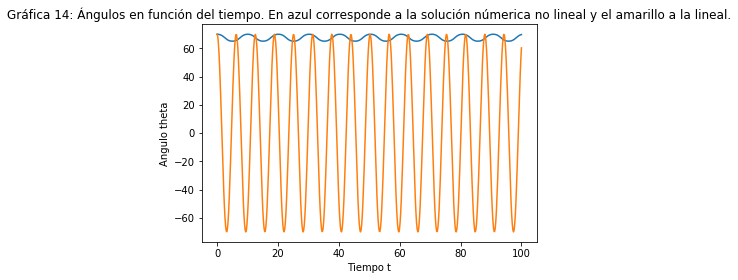

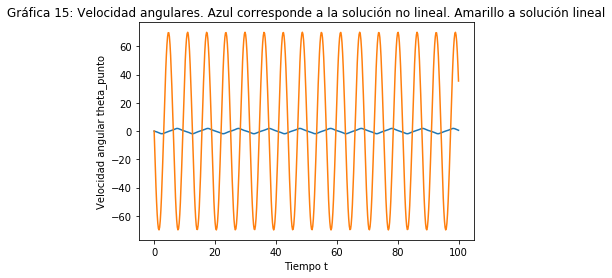

In [369]:
from scipy import integrate

def dY_dt(Y, t = 0):

    return(np.array([Y[1], -(omega0**2)*(mt.cos(Y[0]))]))

def dY_dtlineal(Y, t = 0):

    return(np.array([Y[1], -(omega0**2)*Y[0]]))
                 
t = np.linspace(0, 100, 500)
omega0 = 1.
                 
Y0 = np.array([70, 0])
                 
Y = integrate.odeint(dY_dt, Y0, t)
Ylineal = integrate.odeint(dY_dtlineal, Y0, t)
                 
plt.plot(t, Y[:, 0], t, Ylineal[:, 0])  
plt.title('Gráfica 14: Ángulos en función del tiempo. En azul corresponde a la solución númerica no lineal y el amarillo a la lineal.')
plt.xlabel('Tiempo t')
plt.ylabel('Angulo theta')
plt.show()

plt.plot(t, Y[:, 1], t, Ylineal[:, 1])
plt.title('Gráfica 15: Velocidad angulares. Azul corresponde a la solución no lineal. Amarillo a solución lineal')
plt.xlabel('Tiempo t')
plt.ylabel('Velocidad angular theta_punto')
plt.show()

A continuación se muestra el espacio de fase para la solución númerica variando de 10 en 10 grados a partir de 90 hasta llegar a -90 como condición inicial.

# 3. Ecuacion no lineal amortiguada no forzada

a) Para este sistema se tiene la ecuación:
$$ \ddot{\theta} + \mu\dot{\theta} + \omega_{0}^{2}\sin(\theta) = 0 $$

De la cual, haciendo un cambio de variables $x = \dot{\theta}$ se obtienen las siguientes ecuaciones diferenciales de primer orden:

$$ \dot{\theta} = x $$

$$ \dot{x} = -\mu x- \omega_{0}^{2}\sin(\theta) $$

Las cuales son usadas para determinar la solución númerica a través del módulo odeint de scipy como se muestra a continuación. Así como su correspondiente espacio de fase para $\mu = 0.02 $ y $\omega_{0} = 1$.

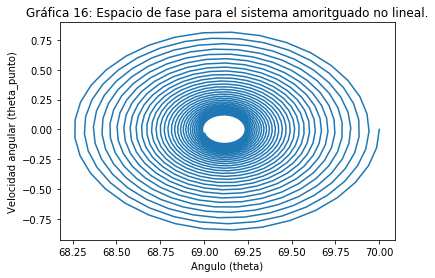

In [370]:
def dY_dt(Y, t = 0):
    
    return(np.array([Y[1], - mu*Y[1] - (omega0**2)*mt.sin(Y[0])]))

t = np.linspace(0, 200, 1000)
omega0 = 1.
mu = 0.02
Y0 = ([70, 0])

Y = integrate.odeint(dY_dt, Y0, t)

plt.plot(Y[:,0], Y[:,1])
plt.title('Gráfica 16: Espacio de fase para el sistema amoritguado no lineal.')
plt.xlabel('Angulo (theta)')
plt.ylabel('Velocidad angular (theta_punto)')
plt.show()


# 4. Ecuación no Lineal Completa

a) La ecuación completa para el péndulo es:

$$ \ddot{\theta} + \mu\dot{\theta} + \omega_{0}^{2}\sin(\theta) = A\cos(\omega_{d}t) $$

De forma análoga a como se hizo anteriormente, se hace el cambio de variable: $x = \dot{\theta}$, quedando así las siguientes ecuaciones de primer orden:

$$ \dot{\theta} = x $$
 
$$ \dot{x} = - \mu x - \omega_{0}^{2}\sin(\theta) + A\cos(\omega_{d}t) $$

Resolviendo así la ecuación diferencial como sigue:

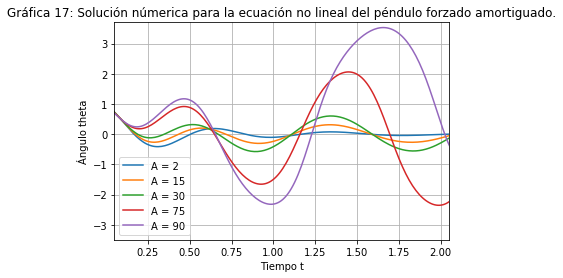

In [371]:
def dY_dt(Y, t = 0):
    
    return(np.array([Y[1], - mu*Y[1] - (omega0**2)*mt.sin(Y[0]) + A*mt.sin(omegad*t)]))

t = np.linspace(-0.05, 10, 1000)
omega0 = 3.*mt.pi
omegad = 2.*mt.pi
mu = (3.*mt.pi)/2.
Y0 = ([1.05, 0])

A = 2.00
F = integrate.odeint(dY_dt, Y0, t)
plt.plot(t, F[:, 0], label = 'A = 2')

A = 15
G = integrate.odeint(dY_dt, Y0, t)
plt.plot(t, G[:, 0], label = 'A = 15')

A = 30
H = integrate.odeint(dY_dt, Y0, t)
plt.plot(t, H[:, 0], label = 'A = 30')

A = 75
J = integrate.odeint(dY_dt, Y0, t)
plt.plot(t, J[:, 0,], label = 'A = 75')

A = 90
K = integrate.odeint(dY_dt, Y0, t)
plt.plot(t, K[:, 0], label = 'A = 90')
plt.xlim(0.05, 2.05)
plt.ylim(-3.5, 3.7)
plt.legend()
plt.grid()
plt.title('Gráfica 17: Solución númerica para la ecuación no lineal del péndulo forzado amortiguado.')
plt.xlabel('Tiempo t')
plt.ylabel('Ángulo theta')
plt.show()

Como puede notarse cuando $A = 2$ (en azul) esta curva tiende muy rápido a cero y tiende a ser una línea recta en cero cuando $\theta_{0}$ tiende a 0. Mientras que conforma A crece los ángulos tienden a amplitudes más grandes. Por otra parte, es interesante notar que todas las curvas parecen cruzarse entre sí entre 0.50 t y 0.70 t.


b) Enseguida se muestran los espacios de fase para los distintos valores de $A$ definidos anteriormente.

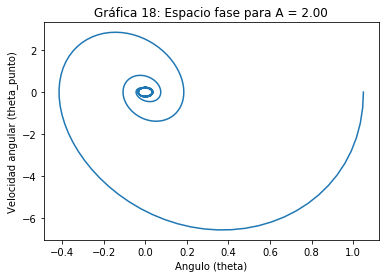

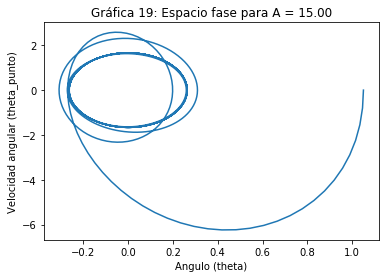

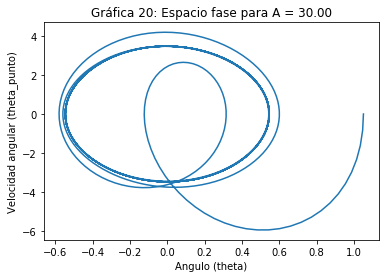

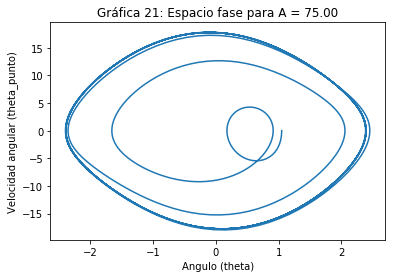

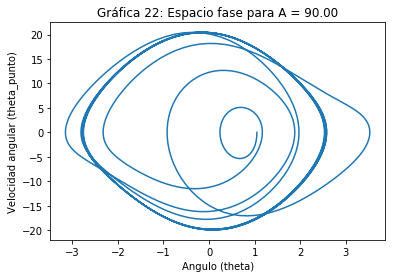

In [372]:
plt.plot(F[:,0], F[:,1])
plt.title('Gráfica 18: Espacio fase para A = 2.00')
plt.xlabel('Angulo (theta)')
plt.ylabel('Velocidad angular (theta_punto)')
plt.show()

plt.plot(G[:,0], G[:,1])
plt.title('Gráfica 19: Espacio fase para A = 15.00')
plt.xlabel('Angulo (theta)')
plt.ylabel('Velocidad angular (theta_punto)')
plt.show()

plt.plot(H[:,0], H[:,1])
plt.title('Gráfica 20: Espacio fase para A = 30.00')
plt.xlabel('Angulo (theta)')
plt.ylabel('Velocidad angular (theta_punto)')
plt.show()

plt.plot(J[:,0], J[:,1])
plt.title('Gráfica 21: Espacio fase para A = 75.00')
plt.xlabel('Angulo (theta)')
plt.ylabel('Velocidad angular (theta_punto)')
plt.show()

plt.plot(K[:,0], K[:,1])
plt.title('Gráfica 22: Espacio fase para A = 90.00')
plt.xlabel('Angulo (theta)')
plt.ylabel('Velocidad angular (theta_punto)')
plt.show()

En las gráficas 18 a 20 puede notarse que el sistema comienza con ángulos y velocidades grandes que tienden a ángulos y velocidades constantes más pequeñas que las condiciones iniciales; mientras que para el resto de los espacios de fase el sistema comienza con valores para la velocidad angular y el angulo más pequeños que a los valores a los cuales tiende conforme pasa el tiempo. Todo esto anterior tiene relación con el valor dado para $A$ el cual está a su vez determinado por la fuerza externa. Conforme más grande es $A$ los sistemas tienden a comportarse más como los sistemas en las gráficas 21 y 22.

# Referencias 
[1]http://sites.psu.edu/teachingexperimentalphysics/wp-content/uploads/sites/13670/2014/07/diff_equations.pdf

[2]https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.odeint.html

[3]Thornton, S., & Marion, J. (2014). Classical dynamics of particles and systems (pp. 99-155). Boston, MA: Cengage Learning.